In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import VarianceThreshold

In the beginning I have imported all the libraries that I need (seaborn and matplotlib for visualizing).

There is 3 missing values in Marketing Spend
Thereis 2 missing values in R&D Spend
Thereis 0 missing values in Administration
Thereis 0 missing values in Profit


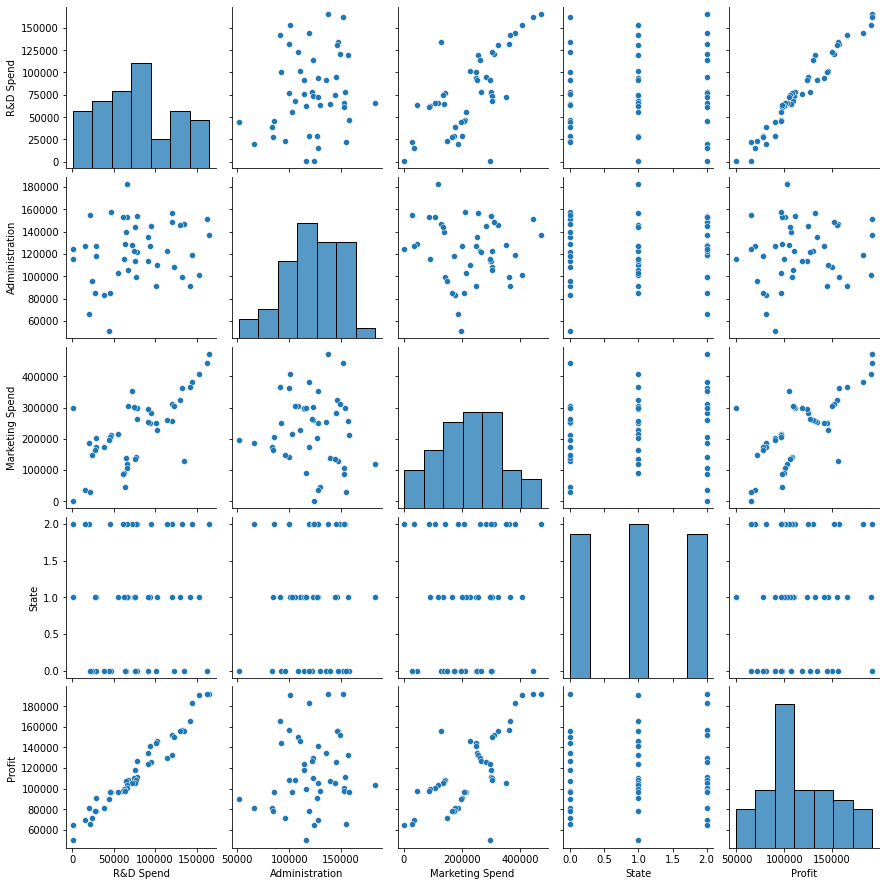

In [ ]:
# Importing the dataset
dataset = pd.read_csv('StartUpProfits.csv',index_col = None)
#Convert the column into categorical columns
#dataset['State'] = dataset['State'].replace(to_replace ="California", value =1)
#dataset['State'] = dataset['State'].replace(to_replace ="New York", value =2)
#dataset['State'] = dataset['State'].replace(to_replace ="Florida", value =3)
le=LabelEncoder()
dataset['State']=le.fit_transform(dataset.State)
cnt=0
sum=0
for i in dataset['Marketing Spend']:
  if int(i)==0 or int(i)//1 == 0:
    cnt+=1
  else:
    sum+=i
print("There is %d missing values in Marketing Spend" %cnt)

if cnt>0:
  dataset['Marketing Spend'] = dataset['Marketing Spend'].replace(to_replace=0,value=np.nan )    
cnt1=0
sum1=0
for i in dataset['R&D Spend']:
  if i==0 or i//1 == 0:
    cnt1+=1
  else:
    sum1+=i
print("Thereis %d missing values in R&D Spend" %cnt1)
if cnt1>0:
  dataset['R&D Spend'] = dataset['R&D Spend'].replace(to_replace=0,value=np.nan )
cnt2=0
sum2=0
for i in dataset['Administration']:
  if i==0 or i//1 == 0:
    cnt2+=1
  else:
    sum2+=i
print("Thereis %d missing values in Administration" %cnt2)
if cnt2>0:   
  dataset['Administration'] = dataset['Administration'].replace(to_replace=0,value=np.nan )
cnt3=0
sum3=0
for i in dataset['Profit']:
    if float(i)==0 or float(i)//1 == 0:
      cnt3+=1
    else:
      sum3+=float(i)
print("Thereis %d missing values in Profit" %cnt3)
if cnt3>0:
  if cnt3 == 1:    
    dataset['Profit'] = dataset['Profit'].replace(to_replace=mis,value=np.nan)
  else:
    for i in mis:
      dataset['Profit'] = dataset['Profit'].replace(to_replace=i,value =np.nan)

dataset=dataset.dropna(axis=0,how='any')
X = dataset.drop("Profit",axis = 1)
y = dataset.Profit  

#save new table
dataset.to_csv("StartUpProfits2.csv", index = False)
dataset = pd.read_csv('StartUpProfits2.csv')
#dataset = pd.read_csv('StartUpProfits.csv')
sns.pairplot(dataset)


 Our data is consist of both numerical( R&D Spend, Administration, Marketing Spend)and categorical data(State).This dataset have 50 samples(the number of rows). As in the problem have mentioned We need to prepare Satate column. Linear regression doesn't konw how to use Newyork, Florida or California. So we should convert the categorical feature in to numerical. At first I changed them by replacing the name of states into 1,2,3. Then I understand that I can use the code by LabelEncoder. 
We can search for the Null (missing data) by functions. In this dataset we have some cells that are zero. we do not know they are exactly missing or 0. In the Marketing it happens 3 times and in R&D spend just 2 times. Because they are just 2 or 3. I think it would be a good idea to omit those values from the analysis or replace zeros by the mean value of those columns(R&D column, Marketing).  In this code, I turned these zeros to Null and omit them from data set .In another code(A1.Q1_1) I replaced those zeros by mean In order to compare them and as a result the r^2 suare gets more near to 1 by omitting that zeros.

[112372.38391799 111358.47964836 103566.34440824 170503.23027369
 136069.16942296 102459.24915741 102391.14608883 136713.37597818
 117255.08332041 100390.33896977]
score is
0.9436721334422868


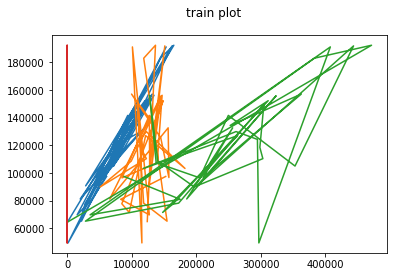

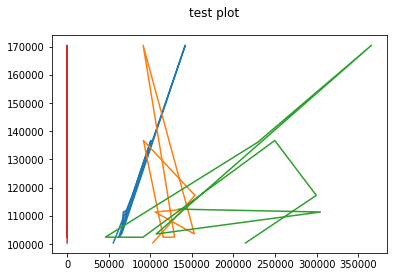

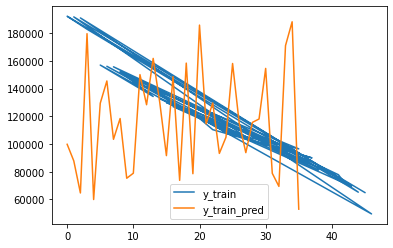

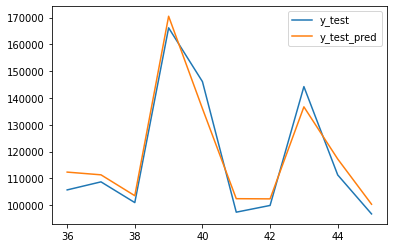

In [ ]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state =0 )
# Fitting Multiple Linear Regression to the Training set
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)
# Predicting the Test set results
y_tpred = regressor.predict(X_train)
y_pred = regressor.predict(X_test)
print(y_pred)
from sklearn.metrics import r2_score
score=r2_score(y_test,y_pred)
print("score is")
print(score)
plt.plot(X_train,y_train)
plt.suptitle('train plot')
plt.show()

plt.plot(X_test,y_pred)
plt.suptitle('test plot')
plt.show()
plt.plot(y_train)
plt.plot(y_tpred)
plt.legend(['y_train','y_train_pred'])
plt.show()
plt.plot(np.arange(len(y_pred)) + len(y_train),y_test)
plt.plot(np.arange(len(y_pred)) + len(y_train), y_pred)
plt.legend(['y_test', 'y_test_pred'])
plt.show()


this plot can shows the relation between each columns. the lighter the color the more connections between those data.

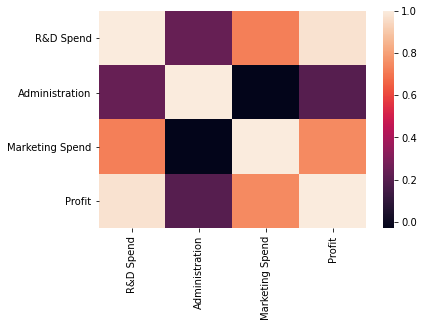

In [ ]:
#visualizing
sns.heatmap(dataset.corr())

whenever we want to predict the data we have 2 sets. Training set and test set that problem asked us to use 80 percent of data for training. 

We want to use the statistical model to predict the relationship between independent and dependent variables in multiple linear regression. our profit is the dependant value and R&D spend, Administration, Marketing Spend, State are independent variables(our features).we use LinearRegression and predict based on test data.We calculate the r square value which is so near to 1 and so it is a good model for this dataset.